In [536]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import scipy.stats as stats
from IPython.display import Markdown, display
#from python_scripts.pricingprocessing import *
import pickle
import seaborn as sns
sns.set_palette('pastel')
sns.set_context('talk')

In [170]:
with open('/home/erin/PycharmProjects/HardwareScrape/data/df.P', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

In [15]:
# df.groupby('author_id').agg('count').sort_values('author_trades', ascending=False)

In [289]:
model_count_df = things_we_want_df[['model','ti','price']].groupby(['model', 'ti']).agg('count').rename({'price':'count'}, axis=1).reset_index().copy()

In [290]:
model_count_df['model'] = model_count_df['model'].astype('int')

In [291]:
model_count_df.sort_values('model')

,model,ti,count
15,560,True,1
16,580,False,1
17,650,False,1
19,660,True,1
18,660,False,2
20,750,True,3
21,760,False,7
22,770,False,6
24,780,True,1
23,780,False,2


In [292]:
labels = model_count_df['model']
non_ti_counts = model_count_df.loc[model_count_df['ti'] == False].sort_values('model')
ti_counts = model_count_df.loc[model_count_df['ti'] == True].sort_values('model')

In [293]:
non_ti_counts.loc[non_ti_counts['model'].isin(ti_counts['model'])==False]

,model,ti,count
16,580,False,1
17,650,False,1
21,760,False,7
22,770,False,6
25,950,False,7
26,960,False,30
27,970,False,55
0,1030,False,2
3,1060,False,110
8,1650,False,3


In [294]:
test_concat = pd.concat([ti_counts,non_ti_counts[['model', 'ti']].loc[non_ti_counts['model'].isin(ti_counts['model'])==False]], axis=0, ignore_index=True, sort=True)

In [157]:
# Drop accidental 460, 570 inclusion
for value in [460, 570, 720,]
filled_non_ti_counts = filled_non_ti_counts.loc[filled_non_ti_counts['model'] != 460]
filled_ti_counts = filled_ti_counts.loc[filled_ti_counts['model'] != 460]


In [302]:
filled_ti_counts.sort_values('count')

,count,model,ti
16,0.0,970,False
10,0.0,580,False
11,0.0,650,False
20,0.0,2060,False
19,0.0,1650,False
12,0.0,760,False
13,0.0,770,False
18,0.0,1060,False
14,0.0,950,False
15,0.0,960,False


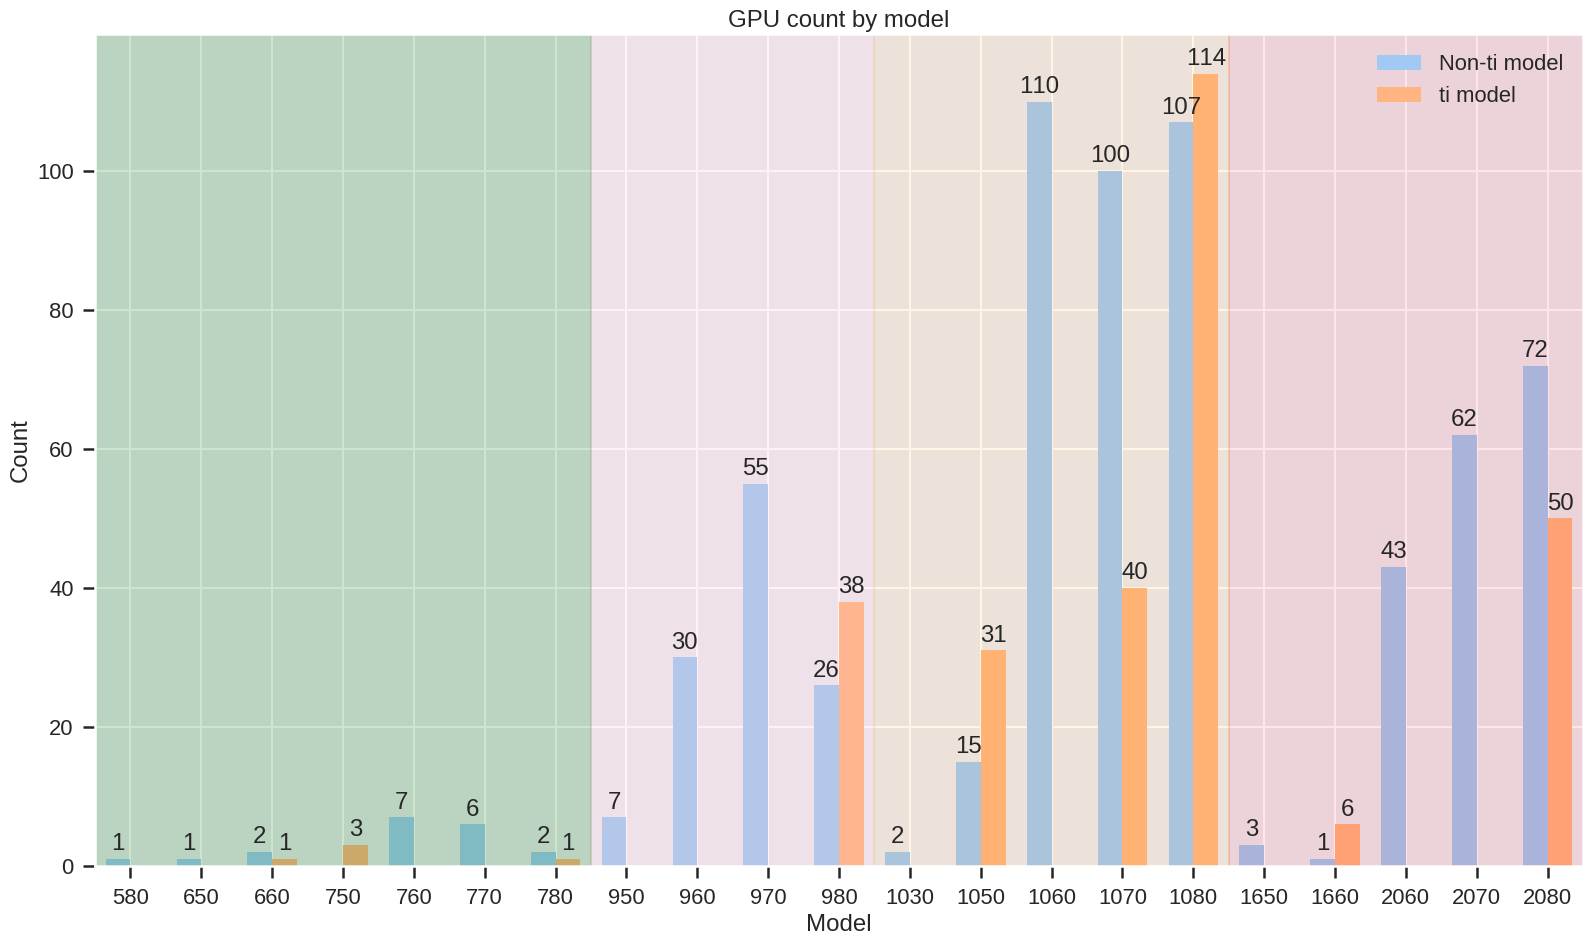

In [606]:
my_dpi=96
fig, ax = plt.subplots(figsize=(1920/my_dpi,1080/my_dpi), dpi=my_dpi)
x = np.arange(len(filled_non_ti_counts['model']))
width = 0.35

rects1 = ax.bar(x - width/2, filled_non_ti_counts['count'], width, label='Non-ti model')
rects2 = ax.bar(x + width/2, filled_ti_counts['count'], width, label='ti model')

ax.set_ylabel('Count')
ax.set_title("GPU count by model")
ax.set_xlabel('Model')
ax.set_xticks(x)
ax.set_xticklabels(filled_non_ti_counts['model'].astype('str'))
ax.set_xlim(xmin=0.5, xmax=x[-1]+.5)
ax.legend()

ax.axvspan(0, 7.5, alpha=0.2, color='g')
ax.axvspan(7.5, 11.5, alpha=0.2, color='pink')
ax.axvspan(11.5, 16.5, alpha=0.1, color='orange')
ax.axvspan(16.5, 22.5, alpha=0.1, color='red')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if int(height) == 0:
            continue
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
plt.savefig('gpu_count.png', dpi=my_dpi)



In [296]:
filled_ti_counts = test_concat.fillna(0).sort_values('model')

In [297]:
filled_ti_counts

,count,model,ti
0,1.0,560,True
10,0.0,580,False
11,0.0,650,False
1,1.0,660,True
2,3.0,750,True
12,0.0,760,False
13,0.0,770,False
3,1.0,780,True
14,0.0,950,False
15,0.0,960,False


In [298]:
test_concat = pd.concat([non_ti_counts,ti_counts[['model', 'ti']].loc[ti_counts['model'].isin(non_ti_counts['model'])==False]], axis=0, ignore_index=True, sort=True)

In [299]:
filled_non_ti_counts = test_concat.fillna(0).sort_values('model')

In [159]:
# Converts location tags to states
state_abr = set('AL AK AZ AR CA CO CT DC DE FL GA HI ID IL IN IA KS KY LA ME MD MA MI MN MO MS MT NE NV NH NJ NM NY NC ND OH OK OR PA RI SC SD TN TX UT VT VA WA WV WI WY'.split())
df['location_tag'].map(lambda x: x[x.find(']')-2:x.find(']')] if x[x.find(']')-2:x.find(']')].upper() in state_abr else np.NaN)
print()

### Below deals with pricing

In [161]:
prices = df[['model','ti','price']].groupby(['model', 'ti']).agg('mean').rename({'price':'avg_used_price'}, axis=1).reset_index().sort_values('model').copy()

In [162]:
prices['model'] = prices['model'].astype('int')

In [251]:
prices = prices.sort_values('model')
prices.head()

,model,ti,avg_used_price
18,560,True,44.0
20,570,True,90.0
19,570,False,85.0
21,580,False,92.5
22,650,False,35.0


In [356]:
msrp_list_of_data = [[560, True, 249, 3528],
                        [580, False, 499, 5018],
                        [650, False, 110, 1835],
                         [660, False, 229, 4130],
                         [660, True, 300, 4658],
                         [750, True, 149, 3763],
                         [760, False, 249, 4938],
                         [770, False, 399, 6065],
                         [780, False, 649, 7957],
                         [780, True, 699, 8887],
    [950, False, 159, 5240],
    [960, False, 199, 5824],
    [970, False, 329, 8642],
    [980, False ,549, 9668],
    [980, True, 649, 11414],
    [1030, False, 79, 2264],
    [1050, False, 109, 4745],
    [1050, True, 139, 6041],
    [1060, False, 299, 9096],
    [1070, False, 399, 11368],
    [1070, True, 449, 12343],
    [1080, False, 599, 12464],
    [1080, True, 699, 14245],
    [1650, False, 149, 7940],
    [1660, False, 219, 10761],
    [1660, True, 279, 11562],
    [2060, False, 349, 12904],
    [2070, False, 599, 14113],
    [2080, False, 799, 15538], 
    [2080, True, 1199, 16737]
                        ]

# r9 290: 7147
price_performance_df = pd.DataFrame(msrp_list_of_data, columns=['model', 'ti', 'msrp', 'g3dmark'])


In [233]:
prices.loc[prices['model'] > 2060]

,model,ti,avg_used_price
14,2070,False,422.672131
15,2070,True,492.142857
17,2080,True,959.080000
16,2080,False,645.986486


In [160]:
df = df.loc[df['model']!='460']

In [217]:
df = df.loc[df['post_id'] != 'ct7xoo']

In [257]:
# df.loc[df['model'] == '1070']
df.loc[(df['model'] == '2060') & (df['ti'] == False) & (df['title_select'].str.contains('super'))]
df['ti'].loc[(df['model'] == '2060') & (df['ti'] == True)]

Series([], Name: ti, dtype: bool)

In [247]:
# Removes all super 2000 nvidia cards
df = df.loc[~((df['title_select'].str.contains('super') == True) & (df['model'].str.contains('20\d0')))]

952

In [261]:
with open('/home/erin/PycharmProjects/HardwareScrape/data/quick_curated_df.P', 'wb') as pickle_file:
    pickle.dump(df, pickle_file)

,price
count,941.000000
mean,323.795430
std,236.627139
min,20.000000
25%,145.000000
50%,275.000000
75%,450.000000
max,1900.000000


In [283]:
things_we_want_df = pd.DataFrame()
things_we_want = [(value[0], value[1]) for value in msrp_list_of_data]
things_we_want
for model, ti in things_we_want:
    things_we_want_df = pd.concat([things_we_want_df, df.loc[(df['model']==str(model)) & (df['ti'] == ti)]])
#         list(print(df.loc[(df['model']==str(model)) & (df['ti'] == ti)]))
#         break
    

In [306]:
things_we_want_df.head(1)

,title_select,selected_text,full_text,full_title,location_tag,post_id,author_id,author_trades,created,price,ti,model
215,asus geforce gtx 560 ti (fermi) directx 11 en...,$44,[Timestamp](https://imgur.com/a/frYfcmb)\n\nI ...,[USA-TX][H] ASUS GeForce GTX 560 Ti (Fermi) Di...,[USA-TX],cj3ptu,None,None,2019-07-29 08:21:14,44.0,True,560


In [395]:
used_price_grouped = things_we_want_df.groupby(['model', 'ti']).agg({'price':['mean', 'min', 'max']}).rename(columns={'price':'used_price'})


In [371]:
# ppindexed = price_performance_df.set_index(['model', 'ti'], sorted=True)
# used_price_grouped.reset_index()


/home/erin/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


ValueError: len(left_on) must equal the number of levels in the index of "right"

In [396]:
used_price_grouped = used_price_grouped.reset_index()
used_price_grouped['model'] = used_price_grouped['model'].astype('int')

In [359]:
price_performance_df

30

In [373]:
price_performance_df.head()

,model,ti,msrp,g3dmark
0,560,True,249,3528
1,580,False,499,5018
2,650,False,110,1835
3,660,False,229,4130
4,660,True,300,4658


In [374]:
used_price_grouped.head()

model     ti       price              
                      mean    min    max
0  1030  False   63.500000   57.0   70.0
1  1050  False   75.000000   60.0  100.0
2  1050   True   97.806452   70.0  150.0
3  1060  False  141.745455   80.0  275.0
4  1070  False  228.450000  125.0  350.0

In [400]:
used_price_grouped.join(price_performance_df, on=['model', 'ti'])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [398]:
used_price_grouped.columns = [' '.join(col).strip() for col in used_price_grouped.columns.values]

In [409]:
price_perf_dataframe = used_price_grouped.set_index(['model', 'ti']).join(price_performance_df.set_index(['model', 'ti'])).reset_index().sort_values('model')

In [425]:
price_perf_dataframe['used_perf_per_dollar'] = price_perf_dataframe['g3dmark']/price_perf_dataframe['used_price mean']
price_perf_dataframe['msrp_perf_per_dollar'] = price_perf_dataframe['g3dmark']/price_perf_dataframe['msrp']

In [413]:
price_perf_dataframe.head(1)

,model,ti,used_price mean,used_price min,used_price max,msrp,g3dmark,used_perf_per_dollar,msrp_perf_per_dollar
15,560,True,44.0,44.0,44.0,249,3528,0.012472,0.070578


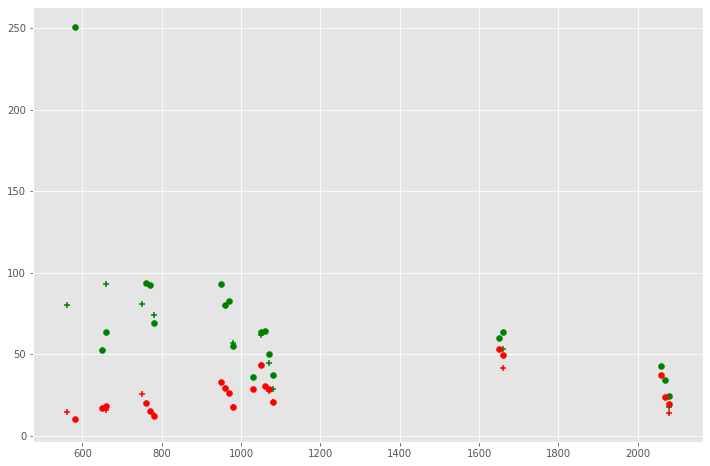

In [427]:
fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(price_perf_dataframe['model'].loc[price_perf_dataframe['ti']==False], price_perf_dataframe['used_perf_per_dollar'].loc[price_perf_dataframe['ti']==False], color='green')
ax.scatter(price_perf_dataframe['model'].loc[price_perf_dataframe['ti']==True], price_perf_dataframe['used_perf_per_dollar'].loc[price_perf_dataframe['ti']==True], color='green', marker='+')

ax.scatter(price_perf_dataframe['model'].loc[price_perf_dataframe['ti']==False], price_perf_dataframe['msrp_perf_per_dollar'].loc[price_perf_dataframe['ti']==False], color='red')
ax.scatter(price_perf_dataframe['model'].loc[price_perf_dataframe['ti']==True], price_perf_dataframe['msrp_perf_per_dollar'].loc[price_perf_dataframe['ti']==True], color='red', marker='+')

# ax.set_xticks(price_perf_dataframe['model'])
# ax.set_xticklabels(price_perf_dataframe['model'].astype('str'))

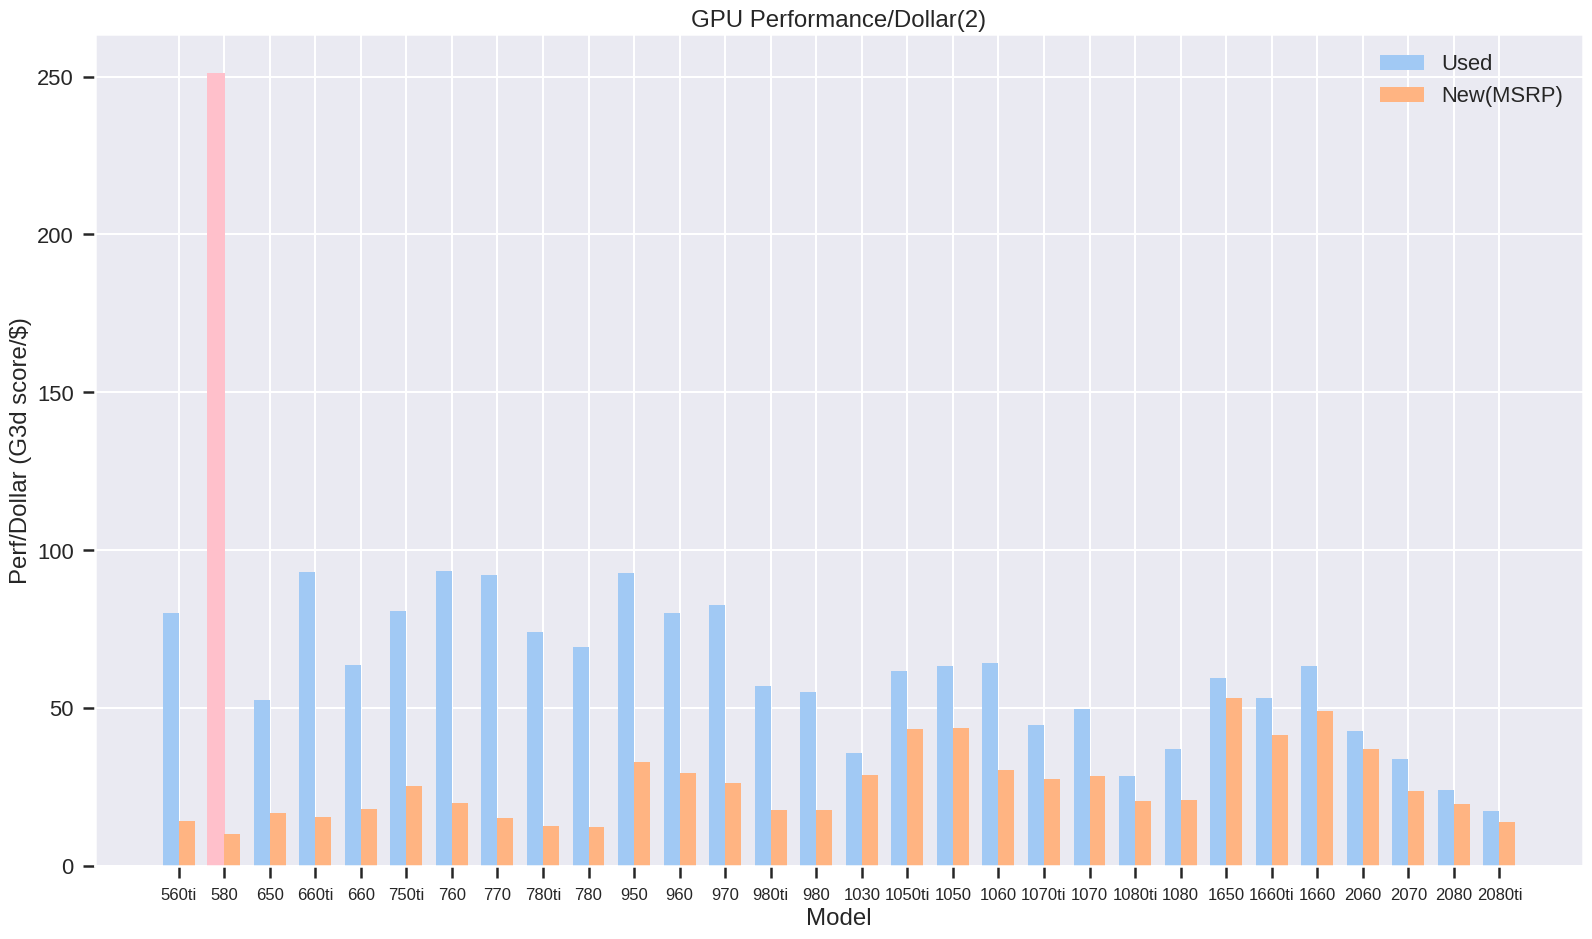

In [542]:
my_dpi = 96
fig, ax = plt.subplots(figsize=(1920/my_dpi,1080/my_dpi), dpi=my_dpi)
x = np.arange(len(price_perf_dataframe['model_name']))
width = 0.35

rects1 = ax.bar(x - width/2, price_perf_dataframe['used_perf_per_dollar'], width, label='Used')
rects2 = ax.bar(x + width/2, price_perf_dataframe['msrp_perf_per_dollar'], width, label='New(MSRP)')
rects1.get_children()[1].set_color('pink')
ax.set_ylabel('Perf/Dollar (G3d score/$)')
ax.set_title("GPU Performance/Dollar(2)")
ax.set_xlabel('Model')
ax.set_xticks(x)
ax.set_xticklabels(price_perf_dataframe['model_name'], fontdict={'fontsize': 'x-small'})
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        pass
#         print(plt.xticks())
#         height = rect.g()
#         if int(height) == 0:
#             continue
#         ax.annotate('{}'.format(int(height)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)


plt.savefig('gpu_ppd_2.png', dpi=my_dpi)


In [444]:
price_perf_dataframe.head(1)

,model,ti,used_price mean,used_price min,used_price max,msrp,g3dmark,used_perf_per_dollar,msrp_perf_per_dollar
15,560,True,44.0,44.0,44.0,249,3528,80.181818,14.168675


In [460]:
ex = lambda model, ti: str(model) +'ti' if ti else str(model)
price_perf_dataframe['model_name'] = price_perf_dataframe['model'].combine(price_perf_dataframe['ti'], ex)

In [461]:
price_perf_dataframe.head()

,model,ti,used_price mean,used_price min,used_price max,msrp,g3dmark,used_perf_per_dollar,msrp_perf_per_dollar,model_name
15,560,True,44.0,44.0,44.0,249,3528,80.181818,14.168675,560ti
16,580,False,20.0,20.0,20.0,499,5018,250.900000,10.056112,580
17,650,False,35.0,35.0,35.0,110,1835,52.428571,16.681818,650
19,660,True,50.0,50.0,50.0,300,4658,93.160000,15.526667,660ti
18,660,False,65.0,50.0,80.0,229,4130,63.538462,18.034934,660


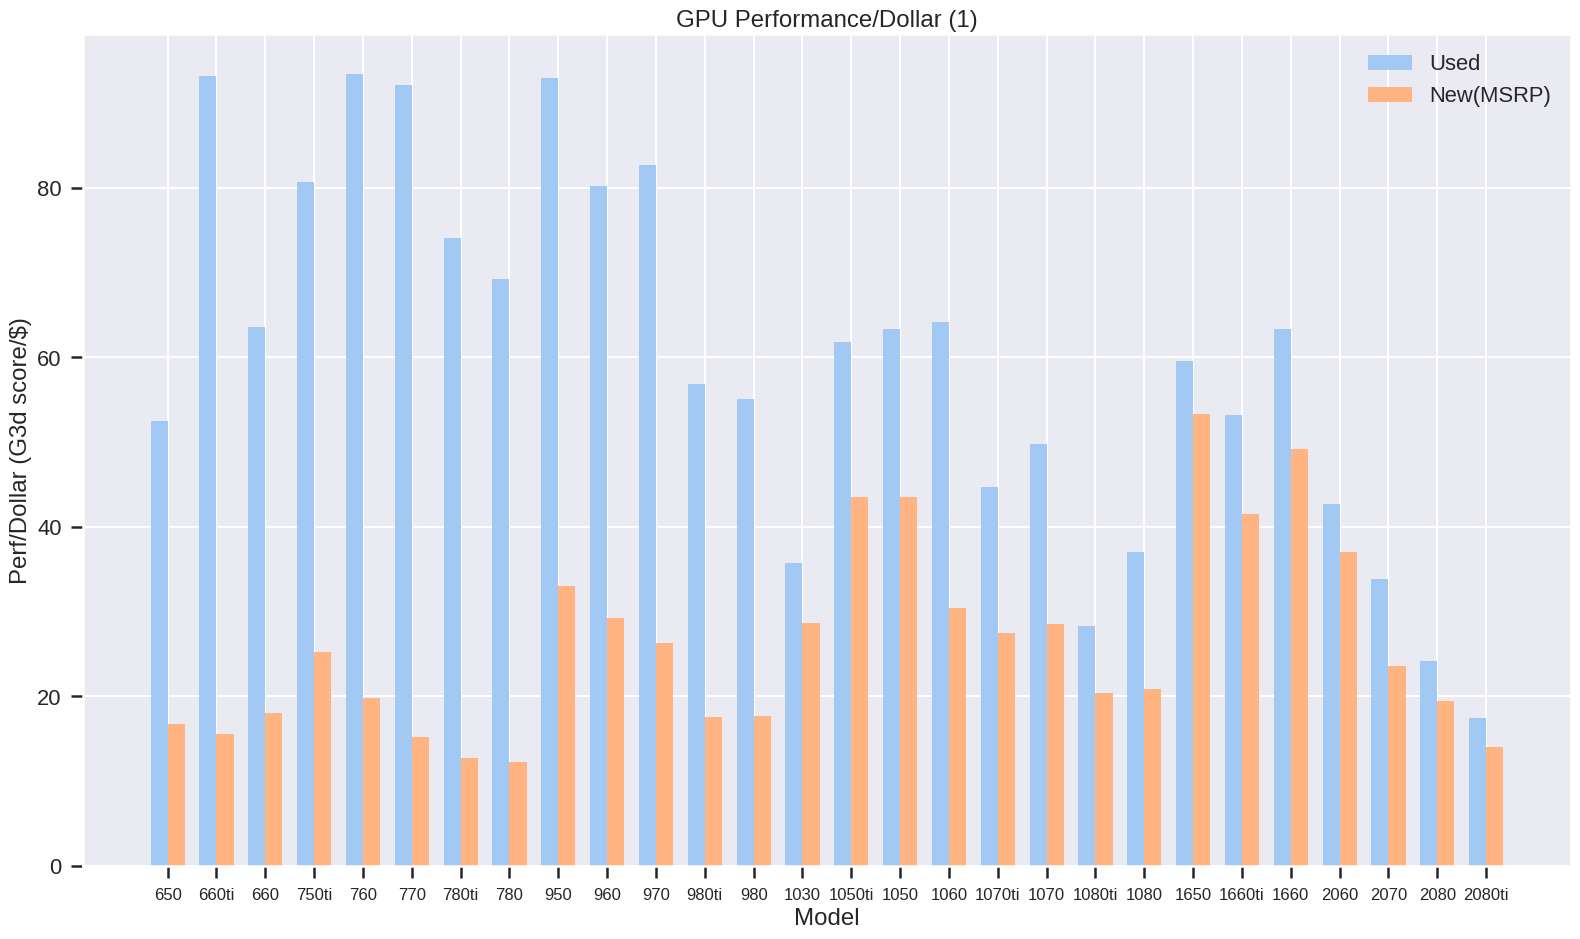

In [544]:
my_dpi = 96
fig, ax = plt.subplots(figsize=(1920/my_dpi,1080/my_dpi), dpi=my_dpi)
x = np.arange(len(price_perf_dataframe['model_name'].loc[price_perf_dataframe['model'] > 600]))
width = 0.35

rects1 = ax.bar(x - width/2, price_perf_dataframe['used_perf_per_dollar'].loc[price_perf_dataframe['model'] > 600], width, label='Used')
rects2 = ax.bar(x + width/2, price_perf_dataframe['msrp_perf_per_dollar'].loc[price_perf_dataframe['model'] > 600], width, label='New(MSRP)')

ax.set_ylabel('Perf/Dollar (G3d score/$)')
ax.set_title("GPU Performance/Dollar (1)")
ax.set_xlabel('Model')
ax.set_xticks(x)
ax.set_xticklabels(price_perf_dataframe['model_name'].loc[price_perf_dataframe['model'] > 600], fontdict={'fontsize': 'x-small'})
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.g()
#         if int(height) == 0:
#             continue
#         ax.annotate('{}'.format(int(height)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
plt.savefig('gpu_ppd_1.png', dpi=my_dpi)


In [478]:
state_abr = set('AL AK AZ AR CA CO CT DC DE FL GA HI ID IL IN IA KS KY LA ME MD MA MI MN MO MS MT NE NV NH NJ NM NY NC ND OH OK OR PA RI SC SD TN TX UT VT VA WA WV WI WY'.split())
things_we_want_df['state'] = things_we_want_df['location_tag'].map(lambda x: x[x.find(']')-2:x.find(']')] if x[x.find(']')-2:x.find(']')].upper() in state_abr else np.NaN)

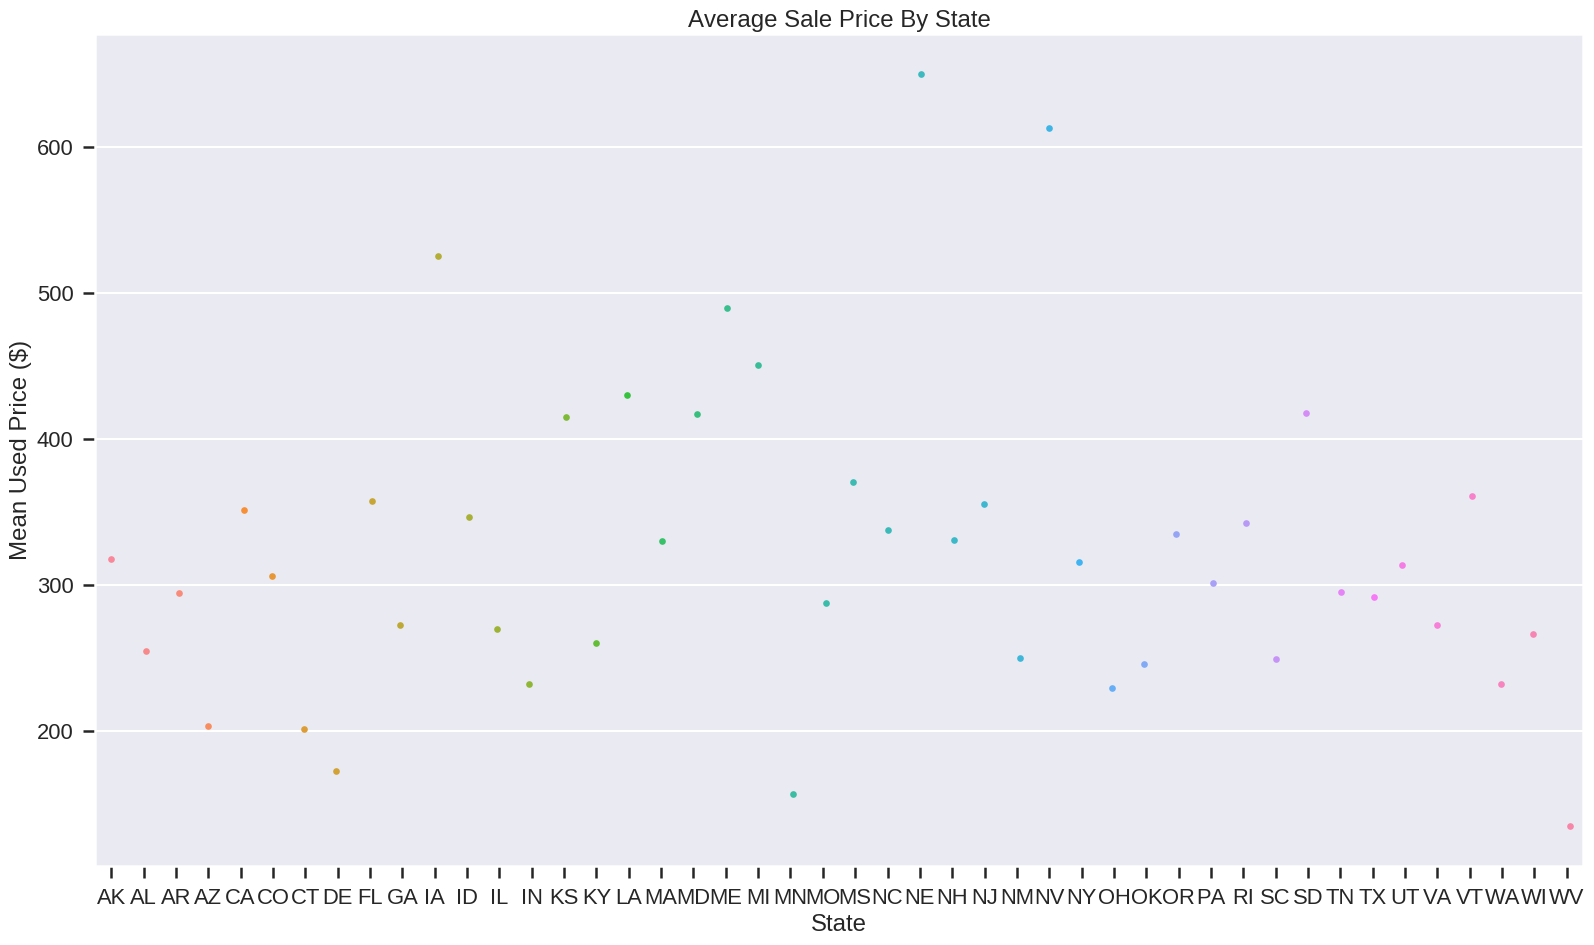

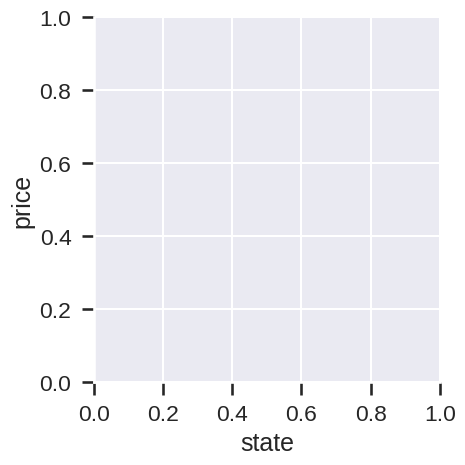

In [612]:
states = things_we_want_df.groupby('state').agg('mean').reset_index()
states.head(1)
fig, axs = plt.subplots(figsize=(1920/my_dpi,1080/my_dpi), dpi=my_dpi)
sns.catplot(x='state', y='price', data=states[['state','price']], ax=axs, kind='strip')
axs.set_ylabel("Mean Used Price ($)")
axs.set_xlabel("State")
axs.set_title('Average Sale Price By State')
fig.savefig('mean_price_per_state.png', dpi=my_dpi)


In [481]:
plt.rcdefaults()

In [590]:
price_perf_dataframe['used_price mean']

,model,ti,used_price mean,used_price min,used_price max,msrp,g3dmark,used_perf_per_dollar,msrp_perf_per_dollar,model_name
15,560,True,44.0,44.0,44.0,249,3528,80.181818,14.168675,560ti
16,580,False,20.0,20.0,20.0,499,5018,250.900000,10.056112,580
17,650,False,35.0,35.0,35.0,110,1835,52.428571,16.681818,650
19,660,True,50.0,50.0,50.0,300,4658,93.160000,15.526667,660ti
18,660,False,65.0,50.0,80.0,229,4130,63.538462,18.034934,660


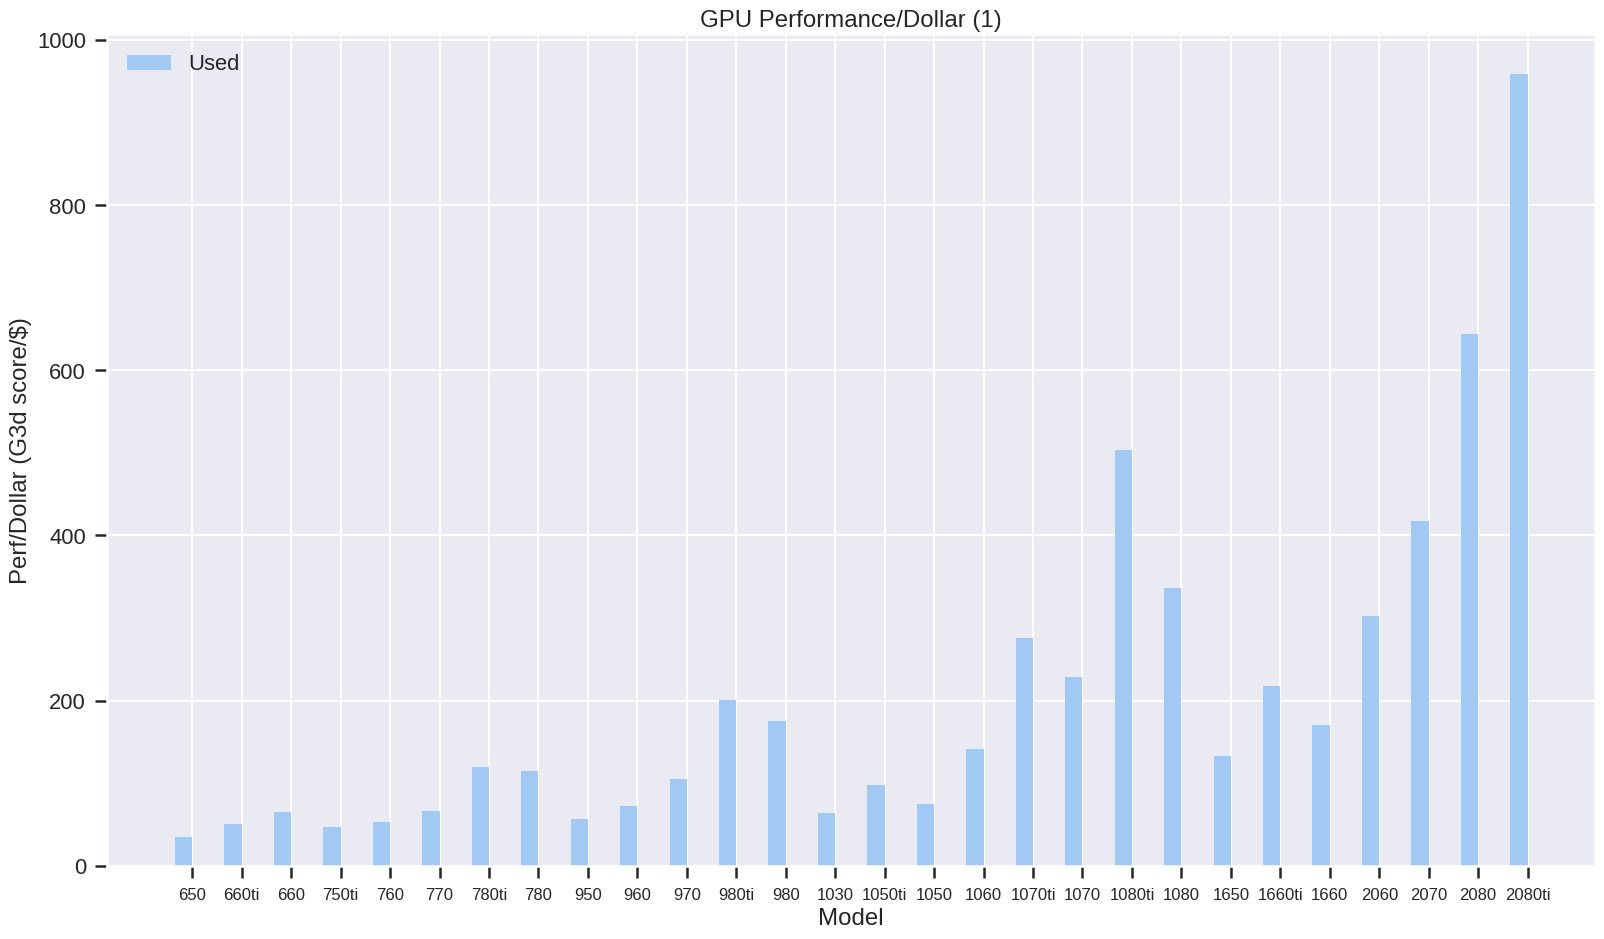

In [593]:
my_dpi = 96
fig, ax = plt.subplots(figsize=(1920/my_dpi,1080/my_dpi), dpi=my_dpi)
x = np.arange(len(price_perf_dataframe['model_name'].loc[price_perf_dataframe['model'] > 600]))
width = 0.35

rects1 = ax.bar(x - width/2, price_perf_dataframe['used_price mean'].loc[price_perf_dataframe['model'] > 600], width, label='Used')

ax.set_ylabel('Perf/Dollar (G3d score/$)')
ax.set_title("GPU Performance/Dollar (1)")
ax.set_xlabel('Model')
ax.set_xticks(x)
ax.set_xticklabels(price_perf_dataframe['model_name'].loc[price_perf_dataframe['model'] > 600], fontdict={'fontsize': 'x-small'})
ax.legend()


# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.g()
#         if int(height) == 0:
#             continue
#         ax.annotate('{}'.format(int(height)),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
plt.savefig('acg_price.png', dpi=my_dpi)


In [615]:
things_we_want_df.loc[things_we_want_df['model']=='950']

,title_select,selected_text,full_text,full_title,location_tag,post_id,author_id,author_trades,created,price,ti,model,state
13,asus strix nvidia 950 gtx,$50,"Just as the title says, I've had this bad boy...",[USA-OR][H] ASUS Strix Nvidia 950 GTX [W] PayP...,[USA-OR],d0j2et,t2_8iqu7,None,2019-09-07 00:37:29,50.0,False,950,OR
41,asus strix nvidia 950 gtx,$50,"Just as the title says, I've had this bad boy ...",[USA-OR][H] ASUS Strix Nvidia 950 GTX [W] PayP...,[USA-OR],cx3o6a,t2_8iqu7,None,2019-08-30 01:02:01,50.0,False,950,OR
118,evga gtx 950 ftw w/backplate,$50,"Barely used by me, GTX 950 in good condition. ...",[USA-IL] [H] EVGA GTX 950 FTW w/backplate [W] ...,[USA-IL],cri07l,t2_9jdv2,Trades: 36,2019-08-17 13:17:46,50.0,False,950,IL
723,asus gtx 950 strix,$60,"~~Hello,~~ **SOLD** \n\n~~Selli...",[USA-OH] [H] Asus GTX 950 Strix [W] Paypal or ...,[USA-OH],b89f99,None,None,2019-04-02 05:29:24,60.0,False,950,OH
749,msi gtx 950 gaming 2gb,$60,I upgraded to RX 580 last week so I'm selling ...,[USA-CA][H] MSI GTX 950 Gaming 2GB [W] PayPal,[USA-CA],b5daqu,t2_1t0eib1z,Trades: 1,2019-03-26 01:04:56,60.0,False,950,CA
763,msi gtx 950,$60,"I have a retired MSI GTX 950 Gaming, 2gb GPU t...",[USA-PA] [H] MSI GTX 950 [W] PayPal,[USA-PA],b3tqsm,t2_m1q7s,None,2019-03-22 02:00:47,60.0,False,950,PA
765,msi gtx 950 gaming 2gb,$65,I upgraded to RX 580 last week so I'm selling ...,[USA-CA][H] MSI GTX 950 Gaming 2GB [W] PayPal,[USA-CA],b3hg7u,t2_1t0eib1z,Trades: 1,2019-03-21 05:05:48,65.0,False,950,CA


In [616]:
price_perf_dataframe

,model,ti,used_price mean,used_price min,used_price max,msrp,g3dmark,used_perf_per_dollar,msrp_perf_per_dollar,model_name
15,560,True,44.000000,44.0,44.0,249,3528,80.181818,14.168675,560ti
16,580,False,20.000000,20.0,20.0,499,5018,250.900000,10.056112,580
17,650,False,35.000000,35.0,35.0,110,1835,52.428571,16.681818,650
19,660,True,50.000000,50.0,50.0,300,4658,93.160000,15.526667,660ti
18,660,False,65.000000,50.0,80.0,229,4130,63.538462,18.034934,660
20,750,True,46.666667,40.0,50.0,149,3763,80.635714,25.255034,750ti
21,760,False,52.857143,30.0,70.0,249,4938,93.421622,19.831325,760
22,770,False,65.833333,50.0,80.0,399,6065,92.126582,15.200501,770
24,780,True,120.000000,120.0,120.0,699,8887,74.058333,12.713877,780ti
23,780,False,115.000000,80.0,150.0,649,7957,69.191304,12.260401,780
